In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from calendar import monthrange
from datetime import date

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Single\\"
building_id = 5
pricing = 'Fixed'

In [2]:
# Read building data:
load = pd.read_excel(ResultsFolder + "Results_curbH_includeTES_True_MgSO4_month_Year_NEEP50_Fixed_Building_id_Size_Varied_" + str(building_id)+".xlsx", sheet_name="load")
load = load.rename(columns={'Unnamed: 0': 'Hour'})
temp = pd.read_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\weather\\ext_temp_Detroit.xlsx")
load['Outdoor Temp'] = temp['temp']

tes_discharge = pd.read_excel(ResultsFolder + "Results_curbH_includeTES_True_MgSO4_month_Year_NEEP50_Fixed_Building_id_Size_Varied_" + str(building_id)+".xlsx", sheet_name="TES")
hp_l = pd.read_excel(ResultsFolder + "Results_curbH_includeTES_True_MgSO4_month_Year_NEEP50_Fixed_Building_id_Size_Varied_" + str(building_id)+".xlsx", sheet_name="HP output")
pur_elec = pd.read_excel(ResultsFolder + "Results_curbH_includeTES_True_MgSO4_month_Year_NEEP50_Fixed_Building_id_Size_Varied_" + str(building_id)+".xlsx", sheet_name="purchased electricity")

load['TES Discharge (kWh)'] = tes_discharge['TES discharge (kWh)']
load['HP to load (kWh)'] = hp_l['HP output to load (kWh)']
load['Purchased Electricity (kWh)'] = pur_elec['Unnamed: 1']
load['SOC'] = tes_discharge['TES SOC (kWh)']
load = load.reset_index()
load['hour'] = load['index'] + 1

idxmax, valmax = load['Load (kWh)'].agg(['idxmax', 'max'])

idxmax

125.0

In [3]:
# Graphing:
mon_to_run = 1
year = 2018

if mon_to_run == 'Year':
    day = 365                                   # Equivalent days
    starting_day = 0
else:
    day = monthrange(year, mon_to_run)[1]       # number of days in specified month
    starting_day = (date(year, mon_to_run, 1) - date(year, 1, 1)).days

hour = day * 24
#starting_hour = starting_day * 24
#end_hour = starting_hour + hour
starting_hour = int(idxmax) - 168/2
end_hour = int(idxmax) + 168/2

# Get COP:
load_cop50_raw = pd.read_excel('C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\cop_temp.xlsx', sheet_name='cop NEEP50')
load['COP'] = 0.000

for i in list(range(len(load['Outdoor Temp']))):
    load_cop50_raw['temp_diff'] = abs(load['Outdoor Temp'][i] - load_cop50_raw['temp C'])
    min_id50 = load_cop50_raw['temp_diff'].idxmin(axis=0)
    load['COP'][i] = float(load_cop50_raw['COP NEEP50'][min_id50])
load

C:\Users\atpha\AppData\Local\Temp\ipykernel_22208\3814631147.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load['COP'][i] = float(load_cop50_raw['COP NEEP50'][min_id50])


,index,Hour,Load (kWh),Outdoor Temp,TES Discharge (kWh),HP to load (kWh),Purchased Electricity (kWh),SOC,hour,COP
0,0,hour 1,18.226712,-16.719999,0.000000e+00,18.226712,14.092966,0.000000e+00,1,1.293320
1,1,hour 2,16.987938,-16.719999,0.000000e+00,16.987938,13.135141,0.000000e+00,2,1.293320
2,2,hour 3,17.211558,-16.719999,0.000000e+00,17.211558,13.308045,0.000000e+00,3,1.293320
3,3,hour 4,17.015076,-15.610000,0.000000e+00,17.015076,9.248911,0.000000e+00,4,1.839684
4,4,hour 5,17.024729,-15.000000,0.000000e+00,17.024729,8.834100,9.050429e-01,5,2.029609
...,...,...,...,...,...,...,...,...,...,...
8755,8755,hour 8756,10.927158,5.000000,0.000000e+00,10.927158,3.104306,3.486966e-07,8756,3.520000
8756,8756,hour 8757,10.946176,5.000000,0.000000e+00,10.946176,3.109709,3.486966e-07,8757,3.520000
8757,8757,hour 8758,11.004044,6.110000,3.417227e-07,11.004043,3.046186,0.000000e+00,8758,3.612400
8758,8758,hour 8759,11.873651,8.890000,0.000000e+00,11.873651,3.085989,0.000000e+00,8759,3.847600


,index,Hour,Load (kWh),Outdoor Temp,TES Discharge (kWh),HP to load (kWh),Purchased Electricity (kWh),SOC,hour,COP
41,41,hour 42,15.153540,-15.000000,0.000000e+00,15.153540,7.466235,7.045095e-07,42,2.029609
42,42,hour 43,16.083519,-15.610000,0.000000e+00,16.083519,8.742542,7.045095e-07,43,1.839684
43,43,hour 44,16.926188,-16.110001,3.486966e-07,16.926188,10.279522,3.486966e-07,44,1.646593
44,44,hour 45,17.487432,-16.110001,0.000000e+00,17.487432,10.620373,3.486966e-07,45,1.646593
45,45,hour 46,17.672383,-16.719999,0.000000e+00,17.672383,13.664357,3.486966e-07,46,1.293320
...,...,...,...,...,...,...,...,...,...,...
205,205,hour 206,17.602722,2.780000,2.217129e-01,17.381009,5.211384,2.217129e-01,206,3.335200
206,206,hour 207,17.415667,1.720000,1.097367e-01,17.305930,5.336725,1.097367e-01,207,3.242800
207,207,hour 208,17.580820,1.720000,0.000000e+00,17.580820,5.421494,1.097367e-01,208,3.242800
208,208,hour 209,17.955856,1.110000,0.000000e+00,17.955856,5.624563,1.097367e-01,209,3.192400


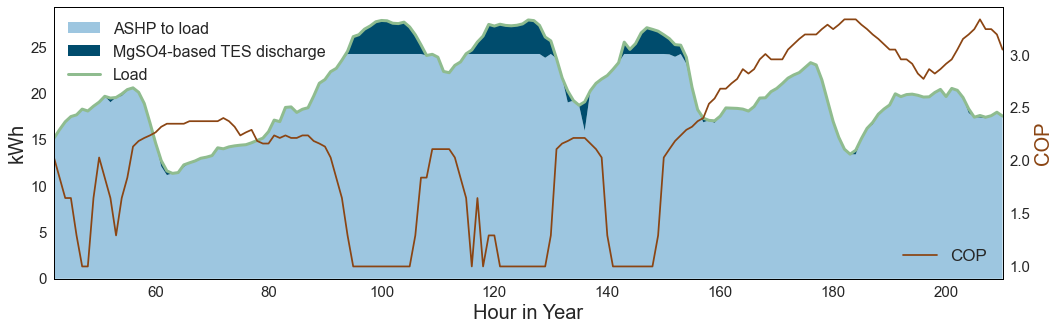

In [5]:
load_truncated = load.truncate(before=starting_hour, after=end_hour)
import seaborn as sns
plt.style.use("seaborn")
colors = ["#9dc6e0", "#004c6d"]
sns.set_style(style='white')
labels=["ASHP to load", "MgSO4-based TES discharge"]

fig, ax1 = plt.subplots(figsize=(17,5))
plt.stackplot(load_truncated['hour'], load_truncated['HP to load (kWh)'],  load_truncated['TES Discharge (kWh)'], labels=labels, edgecolor = 'none', colors=colors)
plt.plot(load_truncated['hour'], load_truncated['Load (kWh)'], label = "Load",linewidth=3, color='darkseagreen')
plt.legend(loc='upper left', fontsize=16)
plt.xlabel("Hour in Year",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("kWh", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.xlim(load_truncated['hour'].min(),load_truncated['hour'].max())

ax2 = ax1.twinx()
ax2.plot(load_truncated['hour'], load_truncated['COP'], label = "COP", color='saddlebrown')
#ax2.plot(load_truncated['hour'], load_truncated['Outdoor Temp'], label = "Outdoor Temp", color='orange',linewidth=3)
plt.ylabel("COP", fontsize=20, color='saddlebrown')
plt.yticks(fontsize=15)
plt.legend(loc='lower right', fontsize=17)

fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/loadReduction_building.png', dpi=300,bbox_inches='tight')

tes_discharge_trun = load_truncated['TES Discharge (kWh)'].sum()
load_trun = load_truncated['Load (kWh)'].sum()
tes_pct = tes_discharge_trun/load_trun
load_truncated

In [77]:
load_truncated

,index,Hour,Load (kWh),Outdoor Temp,TES Discharge (kWh),HP to load (kWh),Purchased Electricity (kWh),SOC,hour,COP
41,41,hour 42,15.153540,-13.9,2.625362,12.528178,5.874052,41.452799,42,2.1328
42,42,hour 43,16.083519,-12.8,0.000000,16.083519,12.766351,53.271417,43,2.1856
43,43,hour 44,16.926188,-12.8,0.000000,16.926188,12.766351,64.247367,44,2.1856
44,44,hour 45,17.487432,-12.2,0.000000,17.487432,12.600315,74.662073,45,2.2144
45,45,hour 46,17.672383,-13.9,0.000000,17.672383,8.286001,74.662073,46,2.1328
...,...,...,...,...,...,...,...,...,...,...
205,205,hour 206,17.602722,-2.8,4.019428,13.583295,4.741446,9.350038,206,2.8648
206,206,hour 207,17.415667,-1.7,2.696887,14.718780,4.977269,6.598112,207,2.9572
207,207,hour 208,17.580820,-0.6,0.000000,17.580820,7.359945,11.462180,208,3.0496
208,208,hour 209,17.955856,0.6,0.000000,17.955856,8.272362,19.567574,209,3.1504


In [27]:
# Compare heat pump outputs:
hp = pd.read_excel(ResultsFolder + "Results_includeTES_False__month_Year_NEEP50_"+pricing+"_Building_id_" + str(building_id)+".xlsx", sheet_name="HP output")
hp_wTES = pd.read_excel(ResultsFolder + "Results_curbH_includeTES_True_MgSO4_month_Year_NEEP50_"+pricing+"_Building_id_" + str(building_id)+".xlsx", sheet_name="HP output")
hp['HP output total - w/TES (kWh)'] = hp_wTES['HP output total (kWh)']
hp['HP output to TES (kWh)'] = hp_wTES['HP output to TES (kWh)']
hp_truncated = hp.truncate(before=starting_hour, after=end_hour)
hp = hp.reset_index()
hp = hp.rename(columns={'index': 'hour'})
hp['hour'] = hp['hour'] + 1

hp_noTES = hp['HP output total (kWh)'].sum()
hp_TES = hp['HP output total - w/TES (kWh)'].sum()
ht_pct = hp_TES/hp_noTES
hp

,hour,Unnamed: 0,Unnamed: 1,HP output to load (kWh),HP output total (kWh),HP output total - w/TES (kWh),HP output to TES (kWh)
0,1,NaN,NaN,18.226712,18.226712,18.226712,0.000000
1,2,NaN,NaN,16.987938,16.987938,24.159572,7.171634
2,3,NaN,NaN,17.211558,17.211558,17.211558,0.000000
3,4,NaN,NaN,17.015076,17.015076,17.015076,0.000000
4,5,NaN,NaN,17.024729,17.024729,19.191533,11.318474
...,...,...,...,...,...,...,...
8755,8756,NaN,NaN,10.927158,10.927158,10.924732,0.000000
8756,8757,NaN,NaN,10.946176,10.946176,10.944975,0.000000
8757,8758,NaN,NaN,11.004044,11.004044,11.003449,0.000000
8758,8759,NaN,NaN,11.873651,11.873651,11.873357,0.000000
